# Learning dynamics for nonlinear autoencoder networks using ReLU activation.

This notebook provides the code to produce Figure 6 in the paper: "Learning dynamics of linear denoising autoencoders". (ICML 2018)

**NOTE:**

The code provided below to rerun all the experiments may take some time to finish (and it is recommended to save the results to disk once completed). However, to just reproduce the plot in Figure 6 of the paper, the learning dynamics data is already available in the `data` folder and can simply be loaded in to create the plot.

In [1]:
# import required modules
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10

# custom imports
from src.nonlinear_ae_net.nonlinear_ae_net import create_model
from src.nonlinear_ae_net.nonlinear_ae_net import train_model

## --- MNIST ---

### Load the data

In [2]:
trans = transforms.Compose([transforms.ToTensor()])

# if not exist, download mnist dataset
train_set = MNIST(root="data", train=True, transform=trans, download=True)
x_train = train_set.train_data.numpy()
x_train = x_train.astype('float32') / 255.
x_train_mnist = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train_mnist.shape)

(60000, 784)


### Train models

In [3]:
# save dynamics data
save = False

# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 50000, 784, 256, 784

# Create input tensors.
x = Variable(torch.FloatTensor(x_train_mnist[:N]), requires_grad=False).cuda()

# specify reconstruction loss
loss_fn = nn.MSELoss()

# hyperparameters
learning_rate = 0.9
n_epoch = 2000
weight_decay = 0.0045
noise_level = 2

# dynamics without regularization
print('ReLU')
model_null = create_model(D_in, H, D_out, act_fn='relu')
dyns_relu_mnist = train_model(x, model_null, loss_fn, n_epoch, learning_rate)
print('ReLU - finished')

# dynamics with regularization
print('ReLU with regularization')
model_reg = create_model(D_in, H, D_out, act_fn='relu')
reg_dyns_relu_mnist = train_model(x, model_reg, loss_fn, n_epoch, learning_rate, weight_decay)
print('ReLU with regularization - finished')

# dynamics with gaussian noise
print('ReLU with noise')
model_noise = create_model(D_in, H, D_out, act_fn='relu', noise=noise_level)
noise_dyns_relu_mnist = train_model(x, model_noise, loss_fn, n_epoch, learning_rate)
print('ReLU with noise - finished')

if save:
    np.save('data/mnist_relu_none_highres', dyns_relu_mnist)
    np.save('data/mnist_relu_reg_highres', reg_dyns_relu_mnist)
    np.save('data/mnist_relu_noise_highres_1', noise_dyns_relu_mnist)

ReLU
ReLU - finished
ReLU with regularization
ReLU with regularization - finished
ReLU with noise
ReLU with noise - finished


## --- CIFAR-10 ---

### Load the data

In [4]:
train_set = CIFAR10(root="data", train=True, transform=trans, download=True)
x_train = train_set.train_data
x_train = x_train.astype('float32')
x_train /= 255
x_train_cifar_10 = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train_cifar_10.shape)

Files already downloaded and verified
(50000, 3072)


### Train models

In [5]:
# save dynamics data
save = False

# D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 30000, 3072, 512, 3072

# Create input Tensor
x = Variable(torch.FloatTensor(x_train_cifar_10[:N]), requires_grad=False).cuda()

# specify loss function
loss_fn = nn.MSELoss()

# hyperparameters
learning_rate = 0.9
n_epoch = 2000

# dynamics without regularization
print('ReLU')
model_null = create_model(D_in, H, D_out, act_fn='relu')
dyns_relu_cifar10 = train_model(x, model_null, loss_fn, n_epoch, learning_rate)
print('ReLU - finished')

# dynamics with regularization
print('ReLU with regularization')
model_reg = create_model(D_in, H, D_out, act_fn='relu')
reg_dyns_relu_cifar10 = train_model(x, model_reg, loss_fn, n_epoch, learning_rate, weight_decay)
print('ReLU with regularization - finished')

# dynamics with gaussian noise
print('ReLU with noise')
model_noise = create_model(D_in, H, D_out, act_fn='relu', noise=noise_level)
noise_dyns_relu_cifar10 = train_model(x, model_noise, loss_fn, n_epoch, learning_rate)
print('ReLU with noise - finished')

if save:
    np.save('data/cifar10_relu_none_highres', dyns_relu_cifar10)
    np.save('data/cifar10_relu_reg_highres', reg_dyns_relu_cifar10)
    np.save('data/cifar10_relu_noise_highres_1', noise_dyns_relu_cifar10)

ReLU
ReLU - finished
ReLU with regularization
ReLU with regularization - finished
ReLU with noise
ReLU with noise - finished


### Plot results

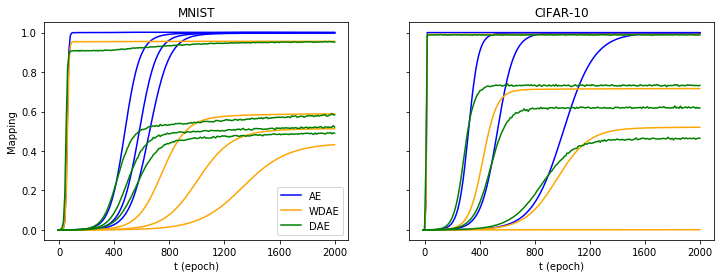

In [6]:
# load saved dynamics data
load = True

if load:
    # mnist relu
    dyns_relu_mnist = np.load('data/mnist_relu_none_highres.npy')
    reg_dyns_relu_mnist = np.load('data/mnist_relu_reg_highres.npy')
    noise_dyns_relu_mnist = np.load('data/mnist_relu_noise_highres_1.npy')
    
    # cifar10 relu
    dyns_relu_cifar10 = np.load('data/cifar10_relu_none_highres.npy')
    reg_dyns_relu_cifar10 = np.load('data/cifar10_relu_reg_highres.npy')
    noise_dyns_relu_cifar10 = np.load('data/cifar10_relu_noise_highres_1.npy')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey='row', sharex='col')
axes = [ax1, ax2]

# plot relu results mnist
x = range(21)
ax1.plot(dyns_relu_mnist[:,0], c='blue', label='AE')
ax1.plot(dyns_relu_mnist[:,1], c='blue')
ax1.plot(dyns_relu_mnist[:,2], c='blue')
ax1.plot(dyns_relu_mnist[:,3], c='blue')
ax1.plot(reg_dyns_relu_mnist[:,0], c='orange', label='WDAE')
ax1.plot(reg_dyns_relu_mnist[:,1], c='orange')
ax1.plot(reg_dyns_relu_mnist[:,2], c='orange')
ax1.plot(reg_dyns_relu_mnist[:,3], c='orange')
ax1.plot(noise_dyns_relu_mnist[:,0], c='green', label='DAE')
ax1.plot(noise_dyns_relu_mnist[:,1], c='green')
ax1.plot(noise_dyns_relu_mnist[:,2], c='green')
ax1.plot(noise_dyns_relu_mnist[:,3], c='green')
ax1.set_xticks(np.linspace(1, 200, 6))
ax1.set_xticklabels(np.linspace(0, 2000, 6, dtype=int))
ax1.set_xlabel('t (epoch)')
ax1.set_ylabel('Mapping')
ax1.set_title('MNIST')
ax1.legend(loc='lower right')

# plot relu results for cifar 10
ax2.plot(dyns_relu_cifar10[:,0], c='blue')
ax2.plot(dyns_relu_cifar10[:,1], c='blue')
ax2.plot(dyns_relu_cifar10[:,2], c='blue')
ax2.plot(dyns_relu_cifar10[:,3], c='blue')
ax2.plot(reg_dyns_relu_cifar10[:,0], c='orange')
ax2.plot(reg_dyns_relu_cifar10[:,1], c='orange')
ax2.plot(reg_dyns_relu_cifar10[:,2], c='orange')
ax2.plot(reg_dyns_relu_cifar10[:,3], c='orange')
ax2.plot(noise_dyns_relu_cifar10[:,0], c='green')
ax2.plot(noise_dyns_relu_cifar10[:,1], c='green')
ax2.plot(noise_dyns_relu_cifar10[:,2], c='green')
ax2.plot(noise_dyns_relu_cifar10[:,3], c='green')
ax2.set_xticks(np.linspace(1, 200, 6))
ax2.set_xticklabels(np.linspace(0, 2000, 6, dtype=int))
ax2.set_xlabel('t (epoch)')
ax2.set_title('CIFAR-10')
ax2.set_ylabel('')

plt.show()

AE (blue), WDAE (orange) and DAE (green). 

**Left**: MNIST 

**Right**: CIFAR-10.